In [1]:
import numpy as np
from math import floor
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def generate_random_vectors(num_vector, dimension):
    return np.random.randn(dimension, num_vector)

In [3]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)



In [7]:
class LocalitySensitaveHash(object):
    def __init__(self, data, hash_length=8, downsample=2900, k=6,
                 dist_func='euclidean', max_iters=50):
        self.data = data.copy()
        self.num_obs = data.shape[0]
        self.dimension = data.shape[1]
        self.hash_length = hash_length
        self.downsample = downsample
        self.fill_hash_table()
        self.num_k = k
        self.assign_distance_function(dist_func)
        self.max_iters = max_iters
        
    def kmeans(self):
        """ Perform the kmeans algorithm on downsampled data
        """
        X = self.downsample_data()
        K = self.num_k
        max_iters = self.max_iters
        centroids = self.init_cluster_centers(K=K, data=X)
        
        for i in range(max_iters):
            
            # assign clusters
            clusters = np.array([np.argmin([self.dist(center, x)
                                for center in centroids]) for x in X])
            
            
            # move cluster center to new mean
            centroids = np.array([X[clusters == k].mean(axis = 0)
                                  for k in range(K)])   
        return centroids
        
    def assign_distance_function(self, string):
        """ Assign the algo with which distance metric to use
        """
        def euclidean_distance(a, b):
            return ((a - b) ** 2).sum()
        
        def cosine_distance(a, b):
            return np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

        def manhattan_distance(a, b):
            return np.absolute(a - b).sum()
        
        # assign the proper distance function to global "dist"
        if string == 'euclidean':
            self.dist = euclidean_distance
            
        elif string == 'cosine':
            self.dist = cosine_distance
        
        elif string == 'manhattan':
            self.dist = manhattan_distance
            
        else:
            raise ValueError("Improper Distance Metric Chosen")
        
        
    def init_cluster_centers(self, K, data):
        """ Generate downsampling initial cluster centers from data.
        
            This is a Kmeans ++ implimentation
        """
        C = [data[np.random.choice(range(data.shape[0]))]]
        for k in range(1, K):

            D2 = np.array([min([np.inner(c-x,c-x) for c in C])
                           for x in data])

            probs = D2/D2.sum().cumsum()
            cumprobs = probs.cumsum()
            r = np.random.rand()
            for j,p in enumerate(cumprobs):
                if r < p:
                    i = j
                    break
            C.append(data[i])
        return C
#         return data[np.random.choice(range(data.shape[0]), size=k)]
    
    def downsample_data(self):
            return self.data[self.sample_from_distribution()]

    def sample_from_distribution(self):

        downsample = [x[:(floor((len(x) / self.num_obs) * self.downsample))] 
                      for x in self.hash_table.values()]

        return np.concatenate(downsample).astype(int)

    def fill_hash_table(self):
        hash_bins = self.create_hash_bins()
        hash_table =  {x: [] for x in np.unique(hash_bins)}
        for idx, hash_key in enumerate(hash_bins):
            hash_table[hash_key].append(idx)
        self.hash_table = hash_table

    def create_hash_bins(self):
        two_vector = 1 << np.arange(self.hash_length -1, -1, -1)
        return self.create_binary_matrix().dot(two_vector)

    def create_binary_matrix(self):
        return self.data.dot(self.generate_encoding_matrix()) >= 0

    def generate_encoding_matrix(self):
        return np.random.randn(self.dimension, self.hash_length)

In [12]:

data, y = make_blobs(n_samples=500000, n_features=200, centers=6)


In [13]:
model = LocalitySensitaveHash(data, k=6, dist_func='manhattan')
down = model.downsample_data()
centers = model.kmeans()

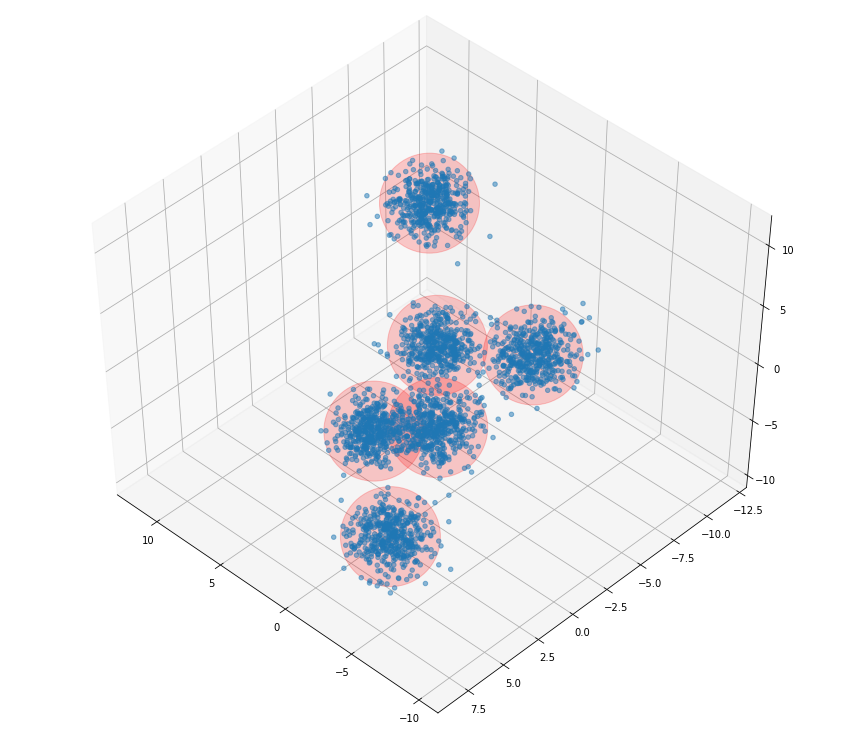

In [14]:
fig = plt.figure(1, figsize=(12, 10))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.scatter(down[:, 0], down[:, 1], down[:, 2], alpha=0.5)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='r',
           alpha=0.2, s=10000)
plt.show()

In [ ]:
(z == 6).sum()

In [ ]:
a = np.array([[1,2,3,4,5], [2,3,4,5,6]])
b = np.array([4,5,6,7,8])
c = np.array([4,3,5,7,8])
d = np.array([2,3,4,5,6])

In [ ]:
def euclidean_distance(a, b):
    return np.absolute(a - b).sum()
dist = euclidean_distance  

In [ ]:
X = np.array([a, b])
cent = np.array([c, d])

In [ ]:
 [np.argmin([dist(x, c) for c in cent]) for x in X]

In [ ]:
np.random.uniform(low=a, high=b, size=(3, 5))[0]

In [ ]:
a[np.random.choice(range(a.shape[0]), size=10)]

In [ ]:
a.shape

In [ ]:
def cluster(X, K, max_iters, dist):

    
    
    
    
    
    
    
    
    
    
    
    

    centroids = init_cluster_centers(K=K, data=X)


    for i in range(max_iters):


        clusters = np.array([np.argmin([self.dist(center, x)
                            for center in centroids]) for x in X])



        centroids = np.array([X[clusters == k].mean(axis = 0)
                              for k in range(K)])   
    return centroids